# THIS IS THE TRIAL ON MATPLOTLIB USING PANDAS DATA FRAME

## WE WILL USE THE car_sales csv as our example.

In [1]:
# importing and managing all libs we need
import numpy as np
import pandas as pd
# magic function on matplotlob 
%matplotlib inline
import matplotlib.pyplot as plt

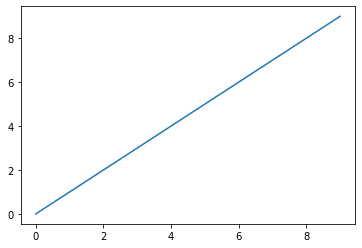

In [2]:
# test 
trialData = range(10)
plt.plot(trialData);

In [3]:
# import the cas sales dataset
car_sales = pd.read_csv('../data/car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [4]:
# Note that the Price is still in String format thus it willnot be considered as value
# thus we need to change it to int or float 
# first we remove non digits characters frotmthe column price
car_sales['Price'] = car_sales['Price'].str.replace('\D','', regex=True).astype(int)/100
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [5]:
# let's make a new column for total sales:
car_sales['Total Sales'] = car_sales['Price'].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total Sales
0,Toyota,White,150043,4,4000.0,4000.0
1,Honda,Red,87899,4,5000.0,9000.0
2,Toyota,Blue,32549,3,7000.0,16000.0
3,BMW,Black,11179,5,22000.0,38000.0
4,Nissan,White,213095,4,3500.0,41500.0
5,Toyota,Green,99213,4,4500.0,46000.0
6,Honda,Blue,45698,4,7500.0,53500.0
7,Honda,Blue,54738,4,7000.0,60500.0
8,Toyota,White,60000,4,6250.0,66750.0
9,Nissan,White,31600,4,9700.0,76450.0


In [6]:
# let's simulate this as date of sales
car_sales["Sale Date"] = pd.date_range('1/1/2020', periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total Sales,Sale Date
0,Toyota,White,150043,4,4000.0,4000.0,2020-01-01
1,Honda,Red,87899,4,5000.0,9000.0,2020-01-02
2,Toyota,Blue,32549,3,7000.0,16000.0,2020-01-03
3,BMW,Black,11179,5,22000.0,38000.0,2020-01-04
4,Nissan,White,213095,4,3500.0,41500.0,2020-01-05
5,Toyota,Green,99213,4,4500.0,46000.0,2020-01-06
6,Honda,Blue,45698,4,7500.0,53500.0,2020-01-07
7,Honda,Blue,54738,4,7000.0,60500.0,2020-01-08
8,Toyota,White,60000,4,6250.0,66750.0,2020-01-09
9,Nissan,White,31600,4,9700.0,76450.0,2020-01-10


### Now to make plot on pandas data frame we can just address the data frame to plot function 
Note: as long as we already import matplotlib.pyplot. 
Thus we can just call it just like making other plot 

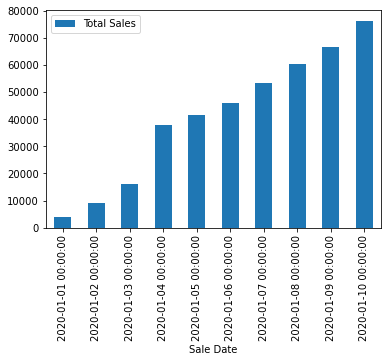

In [7]:
# now let's try to plot sale date as x axis and total sales as y axis
car_sales.plot(x='Sale Date', y='Total Sales', kind='bar');

#### pandas.dataframe.plot() function => https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

 DataFrame.plot(*args, **kwargs)[source]

    Make plots of Series or DataFrame.

    Uses the backend specified by the option plotting.backend. By default, matplotlib is used.

    Parameters

        dataSeries or DataFrame

         x   The object for which the method is called.
        xlabel or position, default None

          y Only used if data is a DataFrame.
        ylabel, position or list of label, positions, default None

            Allows plotting of one column versus another. Only used if data is a DataFrame.
        kindstr

            The kind of plot to produce:

                ‘line’ : line plot (default)

                ‘bar’ : vertical bar plot
                
                'barh' : horizontal bar'

### Now let's try to make car sales odometer and price in scatter type chart


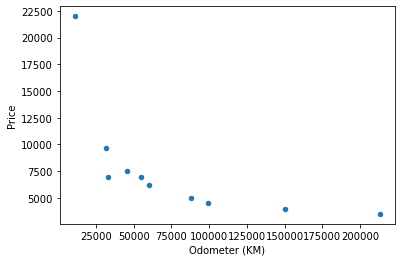

In [8]:
car_sales.plot(x='Odometer (KM)', y='Price', kind="scatter");

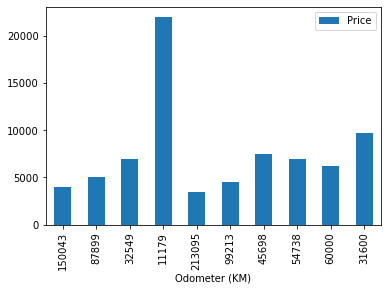

In [9]:
car_sales.plot(x='Odometer (KM)', y='Price', kind="bar");

#### WARNING: SEE HOW THE BAR AND SCATTER SEEMS NOT IN SYNC TO THE DATA?

This is not a mistake!! This is because scatter will have axes of values in the same interval starts from 0 to min or max!!

Meanwhile the Bar chart does not have this, Bar chart will just plot in accordance how the data is written in the dataframe.

We can do similar but that means we need to make the dataframe sort according to the odometer KM ascending.

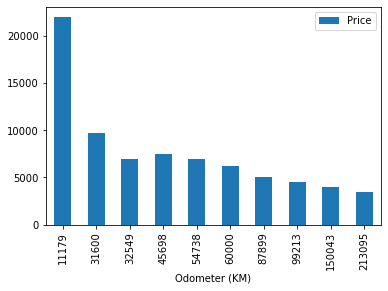

In [10]:
# Here the example on how to make the bar chart more like scatter 
# after sorting the car_sales dataframe according to Odomenter (KM)
car_sales.sort_values(by="Odometer (KM)").plot(x='Odometer (KM)', y='Price', kind="bar");

### BAR
1. concept
1. DataFrame

In [11]:
# let's make random data.
# we make random numbers array with shape (10,4)
data_random = np.random.rand(10,4)
data_random

array([[0.86264209, 0.1208218 , 0.00715653, 0.69298354],
       [0.64270066, 0.76499148, 0.93865911, 0.28369606],
       [0.62359962, 0.69099875, 0.90923455, 0.91503167],
       [0.65466084, 0.50531737, 0.07804061, 0.99204194],
       [0.08307387, 0.06292308, 0.10669515, 0.20795754],
       [0.35625743, 0.71584821, 0.08193625, 0.21084431],
       [0.96073908, 0.60697296, 0.04800374, 0.8844677 ],
       [0.94519077, 0.66180767, 0.61990509, 0.53269591],
       [0.75343554, 0.38536276, 0.75037312, 0.11344588],
       [0.12668633, 0.54549545, 0.99551988, 0.29308133]])

In [12]:
# transform it into dataframe using pandas
df_random = pd.DataFrame(data_random, columns=['a', 'b','c','d'])
df_random

,a,b,c,d
0,0.862642,0.120822,0.007157,0.692984
1,0.642701,0.764991,0.938659,0.283696
2,0.623600,0.690999,0.909235,0.915032
3,0.654661,0.505317,0.078041,0.992042
4,0.083074,0.062923,0.106695,0.207958
5,0.356257,0.715848,0.081936,0.210844
6,0.960739,0.606973,0.048004,0.884468
7,0.945191,0.661808,0.619905,0.532696
8,0.753436,0.385363,0.750373,0.113446
9,0.126686,0.545495,0.995520,0.293081


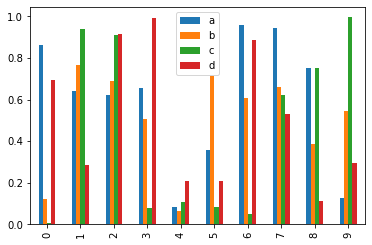

In [16]:
#  DataFrame.plot(*args, **kwargs)[source]

#     Make plots of Series or DataFrame.

#     Uses the backend specified by the option plotting.backend. By default, matplotlib is used.

#     Parameters

#         dataSeries or DataFrame

#             The object for which the method is called.
#         xlabel or position, default None

#             Only used if data is a DataFrame.
#         ylabel, position or list of label, positions, default None

#             Allows plotting of one column versus another. Only used if data is a DataFrame.
#         kindstr
df_random.plot(kind='bar');

In [17]:
## Now we make bar chart with existing data frame car sales
## this time we will set x axis to Make
## and y axis to Odometer (KM)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total Sales,Sale Date
0,Toyota,White,150043,4,4000.0,4000.0,2020-01-01
1,Honda,Red,87899,4,5000.0,9000.0,2020-01-02
2,Toyota,Blue,32549,3,7000.0,16000.0,2020-01-03
3,BMW,Black,11179,5,22000.0,38000.0,2020-01-04
4,Nissan,White,213095,4,3500.0,41500.0,2020-01-05
5,Toyota,Green,99213,4,4500.0,46000.0,2020-01-06
6,Honda,Blue,45698,4,7500.0,53500.0,2020-01-07
7,Honda,Blue,54738,4,7000.0,60500.0,2020-01-08
8,Toyota,White,60000,4,6250.0,66750.0,2020-01-09
9,Nissan,White,31600,4,9700.0,76450.0,2020-01-10


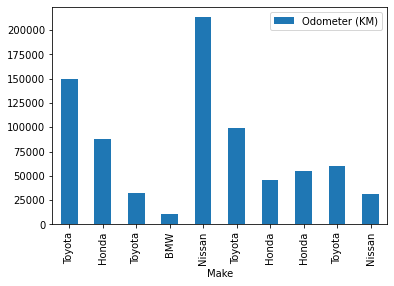

In [19]:
# pandas.DataFrame.plot
car_sales.plot(kind='bar', x='Make', y='Odometer (KM)');

#### NOTE:
I tend to make mistakes of not using ';' in the end of Matplotlib and Pandas plot function.

**REMEMBER** : THE ';' MAKES THE PLOT RESULT NON ADDRESS ARRAY 

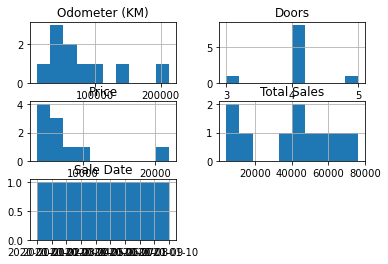

In [22]:
# Histogram
# let's make histogram for Odometer (KM)
# This is different than making plot from other dataframe
# pandas.DataFrame.hist link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
car_sales.hist();

#### NOTE:
This is too much data right? Well this is because we make histogram of all data in car_sales. I need to be more specific!

I need the histogram of the Odometer(KM). Remember car_sales['Odometer(KM)'] is also dataFrame as part of larger car_sales dataframe.

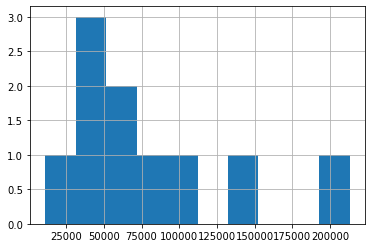

In [24]:
# we make specific histrogram for car_sales' Odometer (KM)
car_sales['Odometer (KM)'].hist();

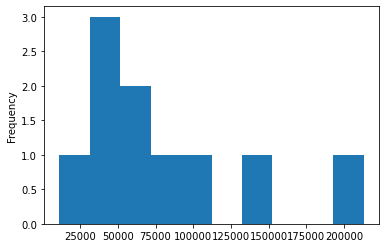

In [25]:
# use the alternative using plot.hist()
car_sales['Odometer (KM)'].plot.hist();

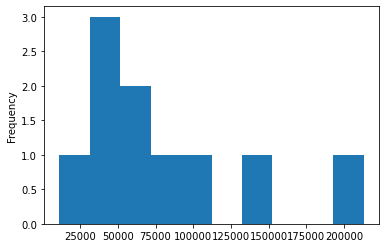

In [26]:
# this is another format of plot histogram.
car_sales['Odometer (KM)'].plot(kind='hist');

#### NOTE:
The dataFrame.hist() result's has grid by default, the plot on both method plot.hist() and plot(kind='hist') will result plain plot. This can have grid is set by the ax (axis) properties.

But what is the different between plot.hist() vs plot(kind='hist')?

Well here hist function have further setting related specific to histogram. The most notable is bins. Which set the number of histogram bars. This also available when using the dataFrame.hist() directly not using plot module.

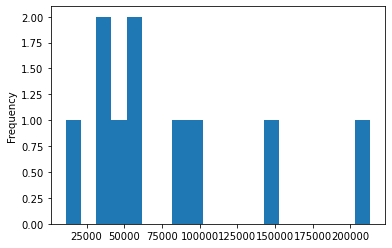

In [27]:
# Make Odometer histogram with different bins
car_sales['Odometer (KM)'].plot.hist(bins=20);

### WE USE NEW DATA FRAME HEART DESEASE
heart desease have many Rows thus it will a good test on the Pandas and plot to process the whole data frame

In [28]:
## Import the dataFrame
heart_disease = pd.read_csv('../data/heart-disease.csv')

## now let's confirm the read is success.
# but since the data is so big we will inspect the head of the dataFrame.
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Note:
This is the dataFrame with many columns. If we directly use heart_disease.hist() it will be too much

We will focus on one data column. From the head of the dataFrame looks like the most spreaded data is age.

Let's see the histogram of the age in heart_disease dataFrame.

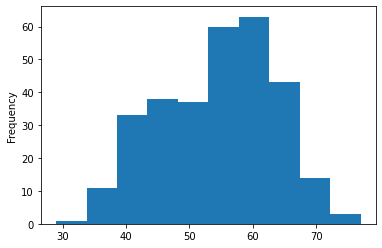

In [29]:
## making histogram for heart_desease age samples.
heart_disease['age'].plot.hist();

#### NOTE:
This is the histogram using the standard bins = 10. 

bins is the number of bar in the histogram in respect of the whole data range.

bins = (max value - min value)/bin_width.
Thus as we set the number of bins (bins) then the width of each bin = bin_width = (max value - min value)/bins

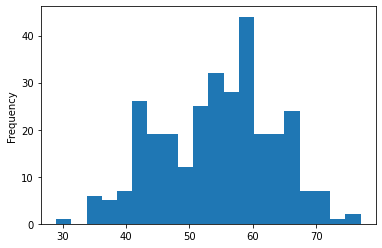

In [30]:
## now compare with larger bins
## in this case we choose the bins= 20
heart_disease['age'].plot.hist(bins=20);

#### NOTE:
the larger we set bins then the descrioption of data distributin is getting more details. But too large setting the bins it will also make the data description vague. 

In this case bins default = 10 make the probability distribution clearer as the mean leaning towards max value. 

Compared to the bins=20 which the mean still areound 60 but the distribution is more vague toward which way they lean.